In [1]:
# Import the libraries 
import pandas as pd

# Clean the CSV file for a single coil

In [50]:
def coil(coil_number,stage):
    # load one csv for the coil at the stage B4 or B5
    df = pd.read_csv(f'SignalExport/{coil_number}B{stage}.csv')
    # Turn it into the list and split it by semicolon
    df= list(df.columns)[0].split(";")
    # Finding index for the length and width
    li=df.index("Lengthpoints:") 
    wi=df.index("Values")
    # Slicing the dataframe into 4 lists 
    coil_num =df[0]
    coil_stage = df[1]
    length=df[li+1:wi]   
    width=df[wi+1:-1]
    # Checking the number of observations in the lists
    #print(f"Number of observations:{len(length),len(width)}")
    # Turning length and width measurements from a string into a float 
    length = [float(i) for i in length]
    width = [float(i) for i in width]
    #Duplicate the coil number for the number of observations in the length 
    mult_coil_values= [coil_num for i in range(len(length))]
    mult_coil_stage_values = [coil_stage for i in range(len(length))]
    # Create an empty dataframe 
    my_df = pd.DataFrame()
    # Turn in the lists into the series  
    mult_coil_values = pd.Series(mult_coil_values)
    coil_stage_values= pd.Series(mult_coil_stage_values)
    length_values = pd.Series(length)
    width_values = pd.Series(width)
    # Create columns and fill them with the series 
    my_df['coil_number'] = mult_coil_values
    my_df['coil_stage'] = mult_coil_stage_values
    my_df['length'] = length_values
    my_df['width'] = width_values
    # Drop the zeros
    my_df = my_df[(my_df != 0).all(1)]
    #Looking at only 140-170 m length
    new_df= my_df.loc[(my_df['length'] >= 140) & (my_df['length'] <= 170)]
    #
    new_df["length_m"] = new_df["length"].astype(int)
    # Checking the shape new_df_B4.shape 
    #print(f"The shape of the sliced dataset is {new_df.shape}")
    return new_df

In [51]:
# Defining the coil
coil_number = 10080
stage = 4

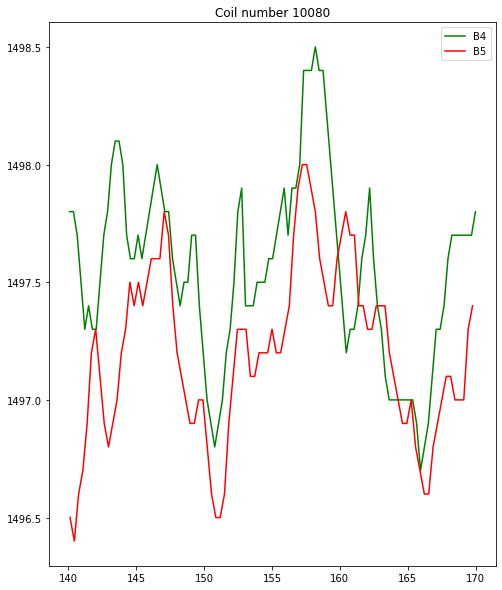

In [35]:
B4_df = coil(coil_number,stage)
B5_df = coil(coil_number,stage+1)

import matplotlib.pyplot as plt
plt.plot(B4_df.length,B4_df.width,"g",label ="B4")
plt.plot(B5_df.length,B5_df.width,"r",label ="B5")
plt.rcParams["figure.figsize"] = (8,10)
plt.title(f"Coil number {coil_number}")
plt.legend()
plt.show()


In [52]:
def calculating_difference(B4_df = coil(coil_number,stage),B5_df = coil(coil_number,stage+1)):
    # Estimating average width at each meter
    average_B4 = pd.Series(B4_df.groupby('length_m')['width'].mean())
    average_B5 = pd.Series(B5_df.groupby('length_m')['width'].mean())
    # Creating a dataframe where we see the averages of B4 and B5 and the differences 
    two_df = pd.DataFrame()
    two_df['Average_B4'],two_df['Average_B5'] =[average_B4, average_B5]
    two_df["difference"] = two_df["Average_B5"] - two_df["Average_B4"]
    two_df = two_df.rename_axis('Length').reset_index()
    display(two_df.head())

C:\Users\Fidrmuc\AppData\Local\Temp/ipykernel_10636/1678473946.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["length_m"] = new_df["length"].astype(int)


In [53]:
calculating_difference()

,Length,Average_B4,Average_B5,difference
0,140,1497.700000,1496.500000,-1.200000
1,141,1497.333333,1496.933333,-0.400000
2,142,1497.575000,1497.025000,-0.550000
3,143,1498.066667,1497.033333,-1.033333
4,144,1497.725000,1497.400000,-0.325000
